# Analysis of Suicide in India

## Warning - If you're having suicidal thoughts, please call suicide helpline! 

Suicide helpline numbers - http://www.suicide.org/international-suicide-hotlines.html


This dataset contains data from 2001 -2012.

Source - https://www.kaggle.com/rajanand/suicides-in-india

In [29]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as pyt
import plotly.graph_objs as go
%matplotlib inline

In [2]:
# read csv file

df = pd.read_csv('Suicides in India 2001-2012.csv')

df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [4]:
df.duplicated().any()

False

In [5]:
df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
197630,Sikkim,2004,Causes,Poverty,Female,0-14,0
25103,Assam,2009,Means_adopted,By Self Infliction of injury,Male,30-44,0
68383,Goa,2002,Means_adopted,By Overdose of sleeping pills,Male,15-29,0
86157,Haryana,2010,Causes,Cancellation/Non-Settlement of Marriage,Male,0-14,0
7757,Andhra Pradesh,2002,Professional_Profile,Student,Male,15-29,238
224047,Uttarakhand,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,15-29,0
80020,Gujarat,2011,Causes,Death of Dear Person,Female,30-44,10
67557,Goa,2001,Causes,Failure in Examination,Female,15-29,1
83492,Haryana,2005,Causes,Cancellation/Non-Settlement of Marriage,Male,45-59,0
136920,Maharashtra,2004,Causes,Family Problems,Male,0-14,41


In [6]:
df.Type_code.value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [7]:
df.Type.value_counts()

Others (Please Specify)                           7263
Student                                           4200
Property Dispute                                  4200
Unemployment                                      4200
Insanity/Mental Illness                           4200
By Hanging                                        4200
By Over Alcoholism                                4200
Paralysis                                         4200
Illegitimate Pregnancy                            4200
Divorce                                           4200
Service (Government)                              4200
By Jumping from (Other sites)                     4200
Other Causes (Please Specity)                     4200
Causes Not known                                  4200
By Overdose of sleeping pills                     4200
Family Problems                                   4200
Failure in Examination                            4200
Service (Private)                                 4200
By Machine

In [8]:
len(df[df['Total'] == 0])

135481

In [9]:
df.State.value_counts()

Karnataka            6792
Maharashtra          6792
Madhya Pradesh       6792
Rajasthan            6791
Odisha               6791
Andhra Pradesh       6791
Chhattisgarh         6790
Haryana              6790
Bihar                6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (States)        312
Total (Uts)           312
Total (All India)     312
Name: State,

In [10]:
df.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

### Data Wrangling

<ul>
<li> Drop rows whose total is zero</li>
<li> Drop rows where state is "Total %"</li>    
</ul>    

In [11]:
# Drop rows where total is zero.

df = df.drop(df[df.Total==0].index)

In [12]:
df[df['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [13]:
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

In [14]:
df.State.value_counts()

Andhra Pradesh       5185
Karnataka            5115
Tamil Nadu           5054
Madhya Pradesh       5029
Maharashtra          4958
Uttar Pradesh        4954
Gujarat              4856
West Bengal          4596
Kerala               4509
Chhattisgarh         4368
Rajasthan            4324
Odisha               4179
Assam                3868
Haryana              3826
Delhi (Ut)           3324
Jharkhand            3210
Bihar                3119
Punjab               2960
Himachal Pradesh     2650
Tripura              2451
Uttarakhand          2442
Goa                  2237
Jammu & Kashmir      2159
Puducherry           2124
Sikkim               1421
A & N Islands        1299
Meghalaya            1180
Chandigarh           1092
Arunachal Pradesh    1062
D & N Haveli          952
Mizoram               786
Manipur               609
Nagaland              587
Daman & Diu           579
Lakshadweep            46
Name: State, dtype: int64

### EDA

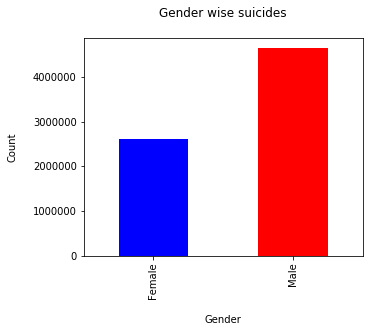

In [50]:
#Gender Suicide Frequency
gender = df.groupby('Gender').sum()['Total'].plot("bar", figsize=(5,4), title ="Gender wise suicides\n", color = ['b','r']);
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n');

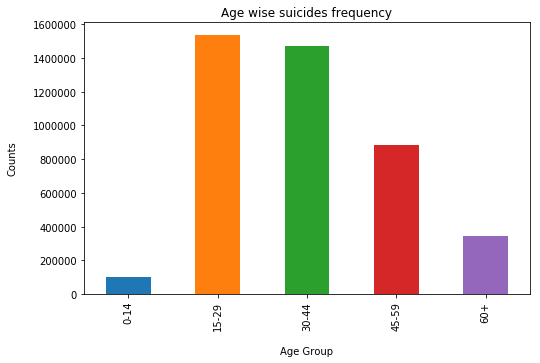

In [50]:
# Age Suicide Frequency
df_Age = df[df['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot("bar",figsize=(8,5), title ="Age wise suicides frequency");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n');

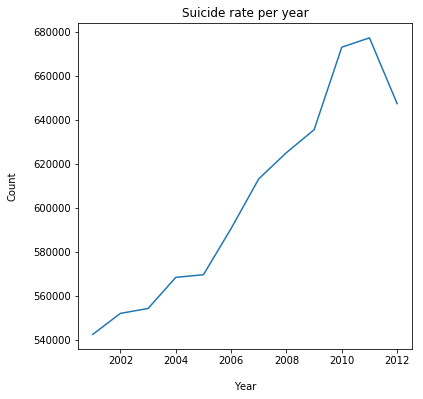

In [62]:
# Suicide rate every year

year = df.groupby('Year').sum()['Total'].plot('line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n');

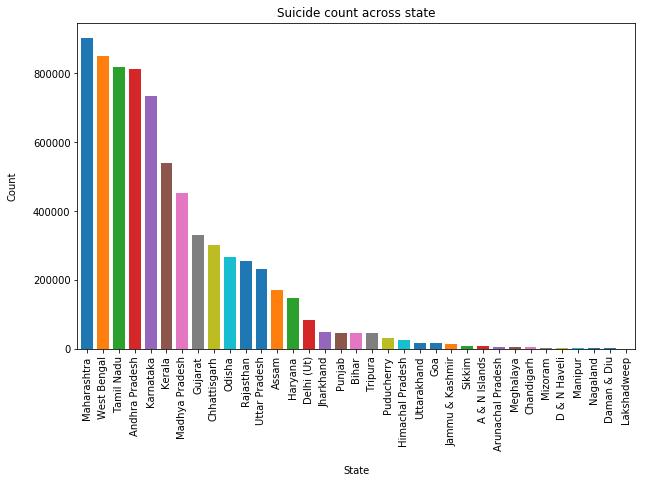

In [82]:
state = df.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)

state_fig = sort_state.plot('bar', figsize = (10,6), title = 'Suicide count across state', width = 0.75)
state_fig.set_xlabel('\nState')
state_fig.set_ylabel('Count\n');

In [84]:
cause = df[df['Type_code'] == 'Causes']
edu_status = df[df['Type_code'] == 'Education_Status']
means_adpt = df[df['Type_code'] == 'Means_adopted']
prof = df[df['Type_code'] == 'Professional_Profile']
soc_status = df[df['Type_code'] == 'Social_Status']

In [93]:
# function to plot

def plot_type(df, Title, X_lab):
    p_type = df.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot('bar', figsize = (10,6), title = Title, width = 0.75)
    fig.set_xlabel(X_lab)
    fig.set_ylabel('Count');   

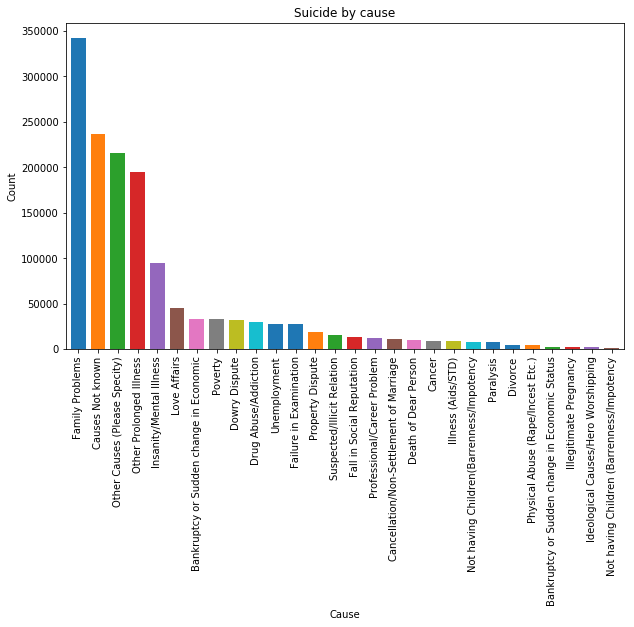

In [94]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')

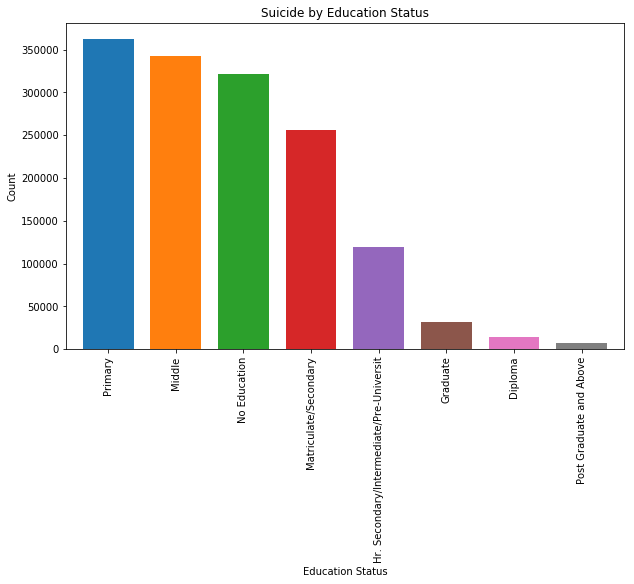

In [95]:
# plot by education status
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

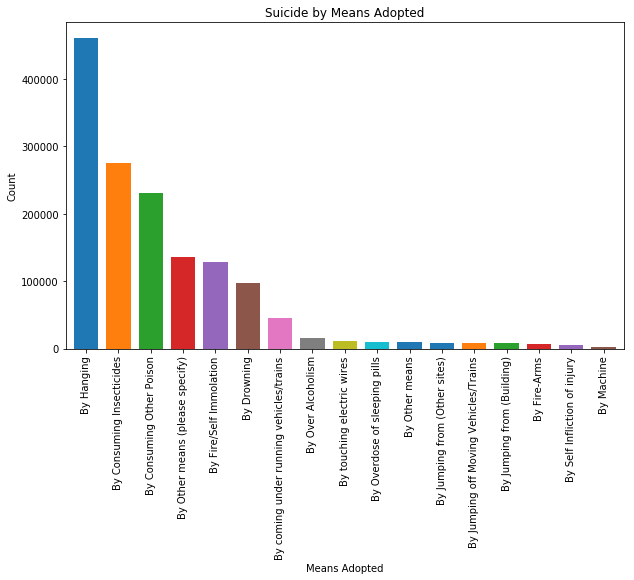

In [96]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

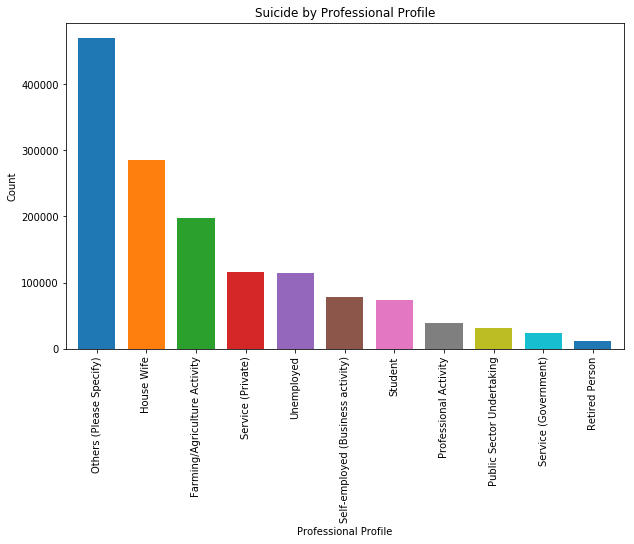

In [97]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

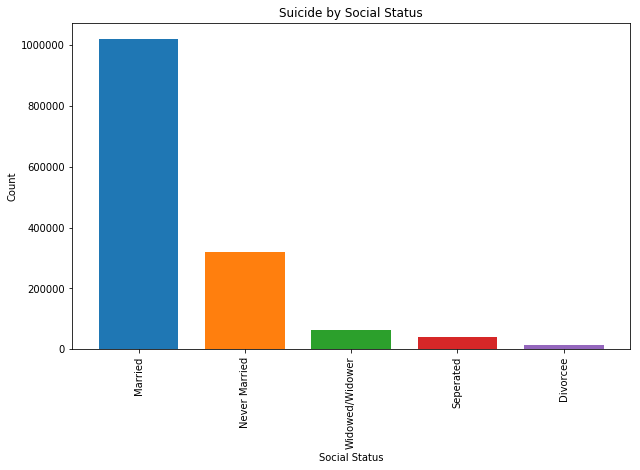

In [99]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status',)